Loading dataset...
Dataset loaded with shape: (22495, 2)

Columns in dataset:
['Case_Description', 'IPC_section']

Data types:
Case_Description    object
IPC_section         object
dtype: object

Missing values per column:
Case_Description    0
IPC_section         0
dtype: int64

Extracting 'Case_Description' and 'IPC_section' columns...
Successfully extracted relevant columns.

Checking for empty or whitespace-only entries...
Empty Case_Description entries: 0
Empty IPC_section entries: 0

IPC Section Distribution:
Number of unique IPC sections: 409
Top 10 most common IPC sections:
IPC_section
IPC 511     55
IPC 120     55
IPC 121     55
IPC 122     55
IPC 123     55
IPC 124     55
IPC 124A    55
IPC 125     55
IPC 126     55
IPC 127     55
Name: count, dtype: int64
Bottom 10 least common IPC sections:
IPC_section
IPC 157    55
IPC 158    55
IPC 144    55
IPC 145    55
IPC 146    55
IPC 147    55
IPC 148    55
IPC 149    55
IPC 150    55
IPC 151    55
Name: count, dtype: int64

Simulat

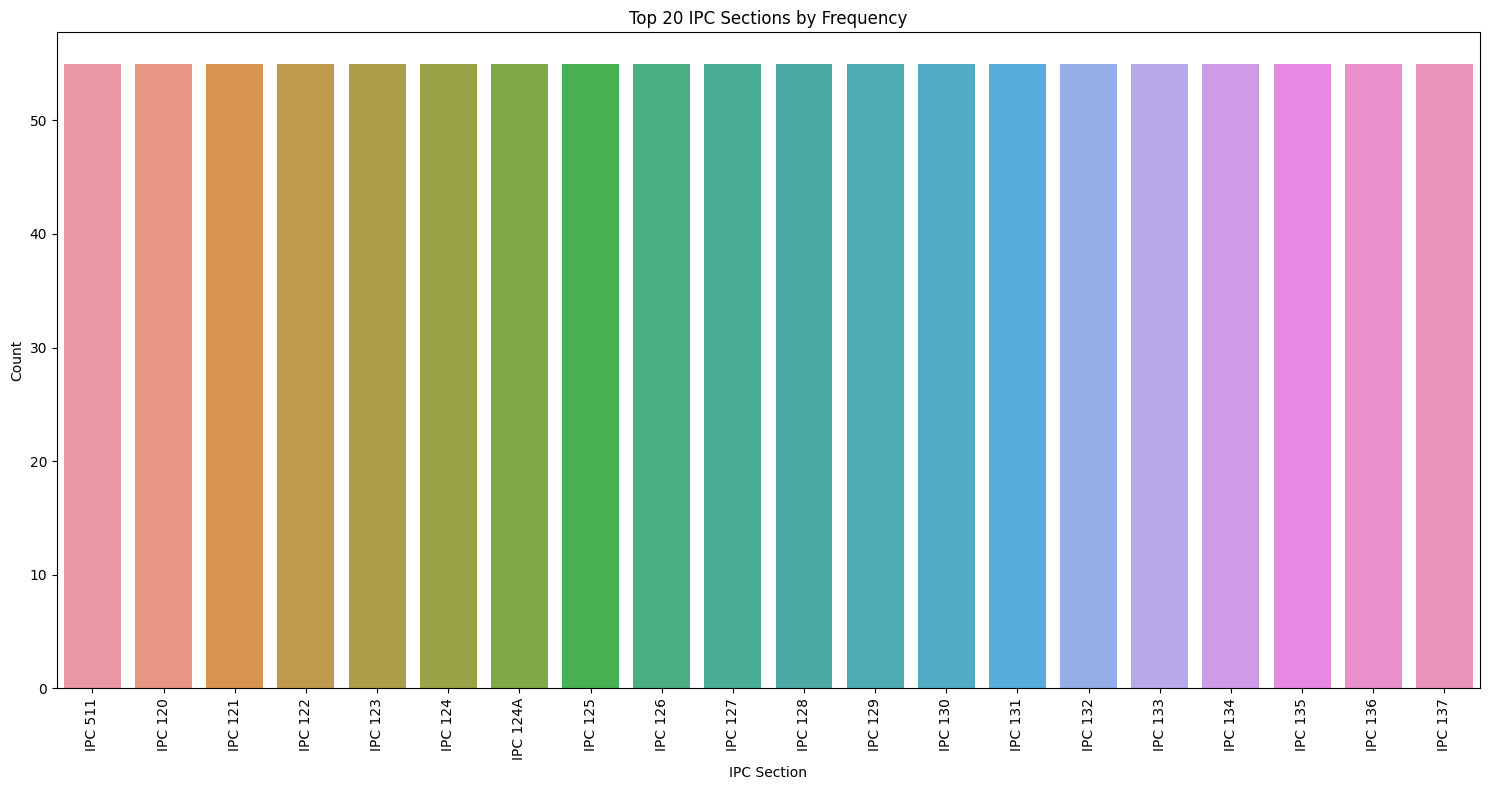

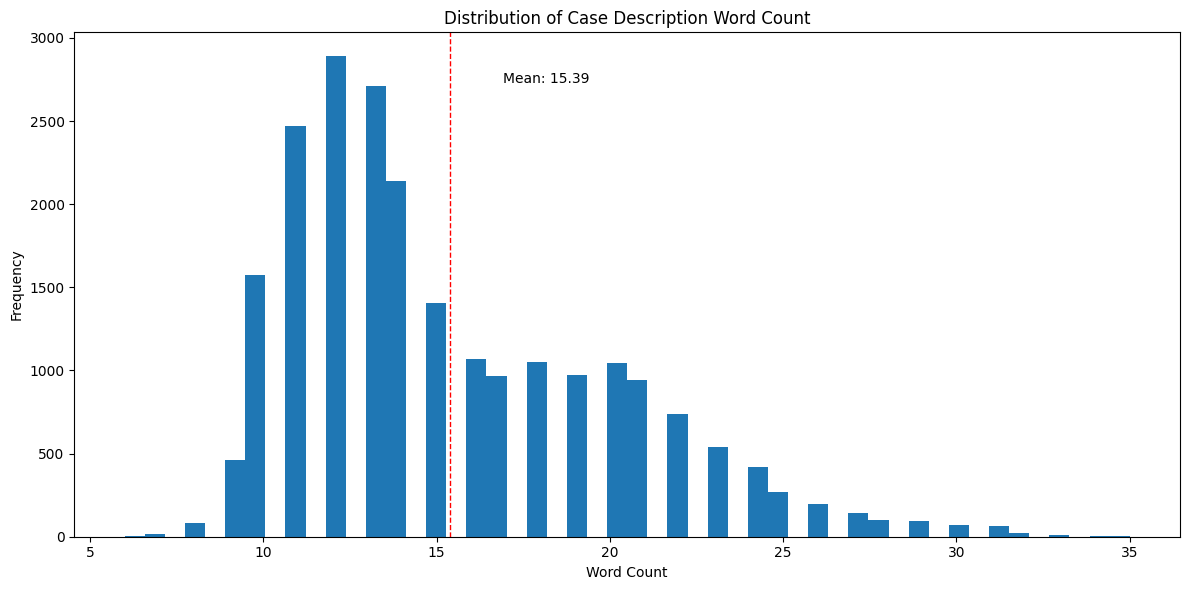

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
print(f"Dataset loaded with shape: {df.shape}")

# Check columns
print("\nColumns in dataset:")
print(df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Extract relevant columns
print("\nExtracting 'Case_Description' and 'IPC_section' columns...")
if 'Case_Description' in df.columns and 'IPC_section' in df.columns:
    analysis_df = df[['Case_Description', 'IPC_section']]
    print("Successfully extracted relevant columns.")
else:
    print("Error: Required columns not found in dataset.")
    available_columns = df.columns.tolist()
    print(f"Available columns: {available_columns}")
    # Try to find columns with similar names
    case_columns = [col for col in available_columns if 'case' in col.lower()]
    ipc_columns = [col for col in available_columns if 'ipc' in col.lower() or 'section' in col.lower()]
    if case_columns:
        print(f"Possible case description columns: {case_columns}")
    if ipc_columns:
        print(f"Possible IPC section columns: {ipc_columns}")
    # If no similar columns found, use the first two columns
    if len(df.columns) >= 2:
        analysis_df = df.iloc[:, :2]
        print(f"Using first two columns as fallback: {df.columns[0]} and {df.columns[1]}")
    else:
        print("Dataset has fewer than 2 columns. Cannot proceed.")
        exit()

# Rename columns if necessary
if 'Case_Description' not in analysis_df.columns or 'IPC_section' not in analysis_df.columns:
    print("Renaming columns for consistency...")
    column_names = analysis_df.columns.tolist()
    analysis_df.columns = ['Case_Description', 'IPC_section']
    print(f"Renamed columns from {column_names} to ['Case_Description', 'IPC_section']")

# Check for empty strings or whitespace-only entries
print("\nChecking for empty or whitespace-only entries...")
empty_case = analysis_df['Case_Description'].str.strip().eq('').sum()
empty_ipc = analysis_df['IPC_section'].str.strip().eq('').sum()
print(f"Empty Case_Description entries: {empty_case}")
print(f"Empty IPC_section entries: {empty_ipc}")

# Clean the data if needed
if empty_case > 0 or empty_ipc > 0:
    print("Cleaning empty entries...")
    analysis_df = analysis_df[analysis_df['Case_Description'].str.strip().ne('')]
    analysis_df = analysis_df[analysis_df['IPC_section'].str.strip().ne('')]
    print(f"After cleaning, dataset shape: {analysis_df.shape}")

# Check IPC section distribution
print("\nIPC Section Distribution:")
ipc_counts = analysis_df['IPC_section'].value_counts()
print(f"Number of unique IPC sections: {len(ipc_counts)}")
print(f"Top 10 most common IPC sections:")
print(ipc_counts.head(10))
print(f"Bottom 10 least common IPC sections:")
print(ipc_counts.tail(10))

# Label encoding simulation
print("\nSimulating label encoding...")
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(analysis_df['IPC_section'])
print(f"Number of unique encoded labels: {len(np.unique(labels))}")
print(f"Sample of encoded labels: {labels[:10]}")
print(f"Corresponding IPC sections: {analysis_df['IPC_section'].iloc[:10].tolist()}")

# Text data analysis
print("\nCase Description Analysis:")
case_lengths = analysis_df['Case_Description'].str.len()
print(f"Average case description length: {case_lengths.mean():.2f} characters")
print(f"Minimum length: {case_lengths.min()} characters")
print(f"Maximum length: {case_lengths.max()} characters")

# Word count analysis
word_counts = analysis_df['Case_Description'].apply(lambda x: len(str(x).split()))
print(f"Average word count: {word_counts.mean():.2f} words")
print(f"Minimum word count: {word_counts.min()} words")
print(f"Maximum word count: {word_counts.max()} words")

# Check for outliers in case description length
print("\nIdentifying outliers in case description length...")
outliers = analysis_df[word_counts > word_counts.quantile(0.99)]
print(f"Number of cases with extremely long descriptions (>99th percentile): {len(outliers)}")
if len(outliers) > 0:
    print(f"Sample outlier (truncated): {outliers['Case_Description'].iloc[0][:200]}...")

# Check for special characters or non-ASCII characters
print("\nChecking for special characters and non-ASCII characters...")
has_special_chars = analysis_df['Case_Description'].apply(lambda x: bool(re.search(r'[^\x00-\x7F]', str(x))))
special_char_count = has_special_chars.sum()
print(f"Number of cases with non-ASCII characters: {special_char_count}")

# Print summary of findings
print("\n====== SUMMARY OF FINDINGS ======")
print(f"Total number of samples: {len(analysis_df)}")
print(f"Number of unique IPC sections: {len(ipc_counts)}")
print(f"Average case description length: {case_lengths.mean():.2f} characters ({word_counts.mean():.2f} words)")
print(f"Most common IPC section: {ipc_counts.index[0]} with {ipc_counts.iloc[0]} occurrences")
print(f"Least common IPC section: {ipc_counts.index[-1]} with {ipc_counts.iloc[-1]} occurrences")
print(f"IPC section distribution balance: {'Balanced' if ipc_counts.max() / ipc_counts.min() < 5 else 'Imbalanced'}")
print("===================================")

# Generate a plot of IPC section distribution (top 20)
plt.figure(figsize=(15, 8))
top20_ipc = ipc_counts.head(20)
sns.barplot(x=top20_ipc.index, y=top20_ipc.values)
plt.title('Top 20 IPC Sections by Frequency')
plt.xlabel('IPC Section')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('ipc_distribution_top20.png')
print("Plot of top 20 IPC sections saved as 'ipc_distribution_top20.png'")

# Generate a histogram of case description length
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=50)
plt.title('Distribution of Case Description Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(word_counts.mean(), color='r', linestyle='dashed', linewidth=1)
plt.text(word_counts.mean()*1.1, plt.ylim()[1]*0.9, f'Mean: {word_counts.mean():.2f}')
plt.tight_layout()
plt.savefig('case_length_distribution.png')
print("Histogram of case description length saved as 'case_length_distribution.png'")

print("\nDataset analysis complete.")

In [ ]:
!pip install evaluate


In [ ]:
import pandas as pd
import torch
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import evaluate
import joblib
from tqdm.auto import tqdm

# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Create necessary directories
os.makedirs("./results", exist_ok=True)
os.makedirs("./logs", exist_ok=True)
os.makedirs("./tinybert_ipc_model", exist_ok=True)

print("Starting IPC section classification training...")

# 1. Load and prepare dataset
print("Loading dataset...")
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
df = df[['Case_Description', 'IPC_section']]

# 2. Encode IPC section labels
print("Encoding labels...")
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['IPC_section'])
num_labels = len(label_encoder.classes_)
print(f"Number of unique IPC sections: {num_labels}")

# 3. Split into train and test sets
print("Splitting dataset...")
train_df, test_df = train_test_split(df, test_size=0.1, random_state=seed, stratify=df['label'])
print(f"Training samples: {len(train_df)}, Test samples: {len(test_df)}")

# 4. Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# 5. Initialize tokenizer
print("Loading tokenizer...")
model_checkpoint = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Since texts are short (avg 15 words), we can use a relatively short max_length
max_length = 128

# 6. Preprocessing function
def preprocess_function(examples):
    return tokenizer(
        examples['Case_Description'], 
        truncation=True,
        padding="max_length",
        max_length=max_length
    )

# 7. Apply preprocessing
print("Preprocessing datasets...")
train_dataset = train_dataset.map(preprocess_function, batched=True, batch_size=64)
test_dataset = test_dataset.map(preprocess_function, batched=True, batch_size=64)

# Configure dataset format for PyTorch
columns_to_return = ['input_ids', 'attention_mask', 'label']
train_dataset.set_format(type='torch', columns=columns_to_return)
test_dataset.set_format(type='torch', columns=columns_to_return)

# 8. Initialize model
print("Loading model...")
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels
)

# 9. Define metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    acc = accuracy.compute(predictions=predictions, references=labels)
    # Use macro averaging since we have many classes
    f1_macro = f1.compute(predictions=predictions, references=labels, average="macro")
    
    return {
        "accuracy": acc["accuracy"],
        "f1_macro": f1_macro["f1"]
    }

# 10. Configure training arguments
batch_size = 32  # Increase batch size since texts are short
print(f"Setting up training with batch size {batch_size}...")

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,  # Slightly higher learning rate
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size * 2,
    num_train_epochs=50,  # More epochs for better learning
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",  # Optimize for F1 macro since it's a multi-class problem
    greater_is_better=True,
    report_to="none",  # Disable integrations for simplicity
)

# 11. Initialize Trainer
print("Initializing trainer...")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=None,  # We don't need to pass tokenizer since we already preprocessed
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# 12. Train model
print("Starting training...")
train_result = trainer.train()
print(f"Training completed. Training metrics: {train_result.metrics}")

# 13. Evaluate model
print("Evaluating model...")
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# 14. Save model, tokenizer, and label encoder
print("Saving model...")
model_path = "./tinybert_ipc_model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)
joblib.dump(label_encoder, os.path.join(model_path, "label_encoder.pkl"))

# 15. Sample predictions
print("\nTesting model with sample predictions...")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def predict_ipc_section(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
    
    # Calculate confidence
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probabilities[0][predicted_class_id].item()
    
    return predicted_label, confidence

# Test a few samples
sample_texts = test_df['Case_Description'].iloc[:3].tolist()
for i, text in enumerate(sample_texts):
    pred_label, confidence = predict_ipc_section(text)
    true_label = test_df['IPC_section'].iloc[i]
    print(f"\nSample {i+1}:")
    print(f"Text: {text}")
    print(f"True IPC section: {true_label}")
    print(f"Predicted IPC section: {pred_label}")
    print(f"Confidence: {confidence:.4f}")

print("\nTraining and evaluation complete!")
print(f"Model saved to {model_path}")

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import joblib
import torch
import os
import evaluate
import numpy as np

# Load previously saved model and tokenizer
model_path = "./tinybert_ipc_model"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(os.path.join(model_path, "label_encoder.pkl"))
num_labels = len(label_encoder.classes_)

# Send model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define metrics again
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=predictions, references=labels)
    f1_macro = f1.compute(predictions=predictions, references=labels, average="macro")
    return {"accuracy": acc["accuracy"], "f1_macro": f1_macro["f1"]}

# Reuse tokenized and formatted datasets from previous code
# (train_dataset and test_dataset must still be in memory)
# If not, reload and tokenize again using your original logic

# Define new training arguments for additional epochs
training_args = TrainingArguments(
    output_dir="./results_continue",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=100,  # 🔁 Continue for 100 more epochs
    weight_decay=0.01,
    logging_dir="./logs_continue",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    resume_from_checkpoint=model_path,
    report_to="none"
)

# Re-initialize Trainer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # ⚠️ reuse your in-memory datasets
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Continue training
print("🔁 Continuing fine-tuning for 100 more epochs...")
trainer.train()

# Save the continued model
continued_path = "./tinybert_ipc_model_continued"
trainer.save_model(continued_path)
tokenizer.save_pretrained(continued_path)
joblib.dump(label_encoder, os.path.join(continued_path, "label_encoder.pkl"))

print(f"✅ Fine-tuning complete. New model saved to {continued_path}")


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from datasets import Dataset

# Load Pretrained Model (e.g., LegalBERT)
model_path = "nlpaueb/legal-bert"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=len(label_encoder.classes_), problem_type="multi_label_classification")

# Load your dataset (assuming multi-label format)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize text with context
def preprocess_function(examples):
    return tokenizer(examples['Case_Description'], truncation=True, padding=True, max_length=128)

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Convert labels to multi-hot encoding
mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_df['IPC_section'].apply(lambda x: x.split(',')))  # Assuming multiple sections are comma-separated
test_labels = mlb.transform(test_df['IPC_section'].apply(lambda x: x.split(',')))

# Update the dataset to include multi-hot encoded labels
train_dataset = train_dataset.add_column("labels", train_labels)
test_dataset = test_dataset.add_column("labels", test_labels)

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results_continue",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=50,
    weight_decay=0.01,
    logging_dir="./logs_continue",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    report_to="none"
)

# Trainer Initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Fine-Tuning Model
print("🔁 Continuing fine-tuning for 100 more epochs...")
trainer.train()

# Save Continued Model
trainer.save_model("./tinybert_ipc_model_continued_context")
tokenizer.save_pretrained("./tinybert_ipc_model_continued_context")


In [ ]:
def predict_ipc_section(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
    
    # Calculate confidence
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probabilities[0][predicted_class_id].item()
    
    return predicted_label, confidence

# Test a few samples
sample_texts = test_df['Case_Description'].iloc[:3].tolist()
for i, text in enumerate(sample_texts):
    pred_label, confidence = predict_ipc_section(text)
    true_label = test_df['IPC_section'].iloc[i]
    print(f"\nSample {i+1}:")
    print(f"Text: {text}")
    print(f"True IPC section: {true_label}")
    print(f"Predicted IPC section: {pred_label}")
    print(f"Confidence: {confidence:.4f}")

print("\nTraining and evaluation complete!")
print(f"Model saved to {model_path}")

In [ ]:
sample_texts = [
    "The accused forcibly entered the victim's house at night and stole cash and jewelry.",
    "A man was found driving a stolen motorcycle and failed to produce ownership documents.",
    "The complainant alleges that her husband and in-laws have been harassing her for dowry.",
    "An individual was caught cheating during a government recruitment exam using electronic devices.",
    "The victim was attacked with a sharp weapon during a dispute over property boundaries.",
    "The company director siphoned off investor money by falsifying financial statements.",
    "An individual created a fake Facebook profile to defame a college professor.",
    "A gang threatened a shopkeeper with firearms and demanded protection money.",
    "Two men were found in possession of illegal arms and explosives during a late-night patrol.",
    "The accused assaulted a traffic policeman who tried to stop him from jumping a red light.",
    "A student hacked college profile to change his university marks",
    "A hacker gained unauthorized access to the company’s database, altering confidential customer information and stealing sensitive data",
    "Public disturbance casued by students singing songs",
    "A man was arrested for making false bomb threats",
    "Woman was gang raped by five men"
]


In [ ]:
print("\n🔍 Testing 10 manually created legal case descriptions...\n")

for i, text in enumerate(sample_texts):
    pred_label, confidence = predict_ipc_section(text)
    print(f"🔹 Sample {i+1}:")
    print(f"📄 Text: {text}")
    print(f"🔮 Predicted IPC Section: {pred_label}")
    print(f"📊 Confidence: {confidence:.4f}\n")


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import joblib
import torch
import os
import evaluate
import numpy as np

# Load previously saved model and tokenizer
model_path = "./tinybert_ipc_model_continued"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(os.path.join(model_path, "label_encoder.pkl"))
num_labels = len(label_encoder.classes_)

# Send model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define metrics again
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=predictions, references=labels)
    f1_macro = f1.compute(predictions=predictions, references=labels, average="macro")
    return {"accuracy": acc["accuracy"], "f1_macro": f1_macro["f1"]}

# Reuse tokenized and formatted datasets from previous code
# (train_dataset and test_dataset must still be in memory)
# If not, reload and tokenize again using your original logic

# Define new training arguments for additional epochs
training_args = TrainingArguments(
    output_dir="./results_continue",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=100,  # 🔁 Continue for 100 more epochs
    weight_decay=0.01,
    logging_dir="./logs_continue",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    resume_from_checkpoint=model_path,
    report_to="none"
)

# Re-initialize Trainer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # ⚠️ reuse your in-memory datasets
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Continue training
print("🔁 Continuing fine-tuning for 50 more epochs...")
trainer.train()

# Save the continued model
continued_path = "./tinybert_ipc_model_continued_1"
trainer.save_model(continued_path)
tokenizer.save_pretrained(continued_path)
joblib.dump(label_encoder, os.path.join(continued_path, "label_encoder.pkl"))

print(f"✅ Fine-tuning complete. New model saved to {continued_path}")


In [7]:
import torch
import joblib
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Path to your continued model
model_path = "/kaggle/working/tinybert_ipc_model_continued_1"
max_length = 128
device = "cuda" if torch.cuda.is_available() else "cpu"

# 🔁 Load model, tokenizer, label encoder
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

# 🔮 Prediction function
def predict_ipc_section(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]

    # Confidence score
    probs = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probs[0][predicted_class_id].item()
    
    return predicted_label, confidence


OSError: Incorrect path_or_model_id: '/kaggle/working/tinybert_ipc_model_continued'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
# Sample text
text = "A man was arrested for making false bomb threats"

# Predict
predicted_ipc, confidence = predict_ipc_section(text)

print("🔮 Predicted IPC Section:", predicted_ipc)
print("📊 Confidence Score:", round(confidence, 4))


In [ ]:
sample_texts = [
    "The accused stabbed the victim during a family dispute.",
    "Woman was raped and killed by a man without her consent",
    "The woman was attacked by a neighbour",
    "car drove at high speed and killed two pedestrians.",
    "The man posted obscene photos of his ex on social media.",
    "A gang robbed a bank and injured the guard.",
    "Man slapped a police officer on duty",
    "A fake job offer was used to cheat young graduates.",
    "Students damaged public property during riot.",
    "A man molested a 14-year-old girl in a market.",
    "A group of thieves robbed a bank using guns and hostages."
]

for i, text in enumerate(sample_texts):
    label, conf = predict_ipc_section(text)
    print(f"\n🔹 Sample {i+1}")
    print(f"📄 Text: {text}")
    print(f"🔮 Predicted IPC Section: {label}")
    print(f"📊 Confidence: {conf:.4f}")


RUN THE BELOW CODE ONLY

In [4]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import joblib
import numpy as np

# Load the previously saved model, tokenizer, and label encoder
model_path = "/kaggle/input/ipc-prediction/tensorflow2/default/1"

model = AutoModelForSequenceClassification.from_pretrained(model_path, local_files_only=True)
tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
label_encoder = joblib.load(os.path.join(model_path, "label_encoder.pkl"))

# Send model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define inference function
def predict_ipc_section(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the predicted class ID
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()
    
    # Get the predicted label (IPC section)
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
    
    # Calculate confidence
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probabilities[0][predicted_class_id].item()
    
    return predicted_label, confidence

# Example: Testing the model with a few case descriptions
sample_texts = [
    "The accused stabbed the victim during a family dispute.",
    "Woman was raped and killed by a man without her consent.",
    "The woman was attacked by a neighbour.",
    "A guy was shot by gang of thieves",
    "The man posted obscene photos of his ex on social media.",
    "A gang robbed a bank and injured the guard.",
    "A man molested a 14-year-old girl in a market.",
    "A group of thieves robbed a bank using guns and hostages",
]

# Test the model on new examples
for i, text in enumerate(sample_texts):
    pred_label, confidence = predict_ipc_section(text)
    print(f"\nSample {i+1}:")
    print(f"Text: {text}")
    print(f"Predicted IPC section: {pred_label}")
    print(f"Confidence: {confidence:.4f}")



Sample 1:
Text: The accused stabbed the victim during a family dispute.
Predicted IPC section: IPC 320
Confidence: 0.5829

Sample 2:
Text: Woman was raped and killed by a man without her consent.
Predicted IPC section: IPC 375
Confidence: 0.9789

Sample 3:
Text: The woman was attacked by a neighbour.
Predicted IPC section: IPC 333
Confidence: 0.8012

Sample 4:
Text: A guy was shot by gang of thieves
Predicted IPC section: IPC 396
Confidence: 0.1445

Sample 5:
Text: The man posted obscene photos of his ex on social media.
Predicted IPC section: IPC 294
Confidence: 0.5188

Sample 6:
Text: A gang robbed a bank and injured the guard.
Predicted IPC section: IPC 390
Confidence: 0.6313

Sample 7:
Text: A man molested a 14-year-old girl in a market.
Predicted IPC section: IPC 354
Confidence: 0.8230

Sample 8:
Text: A group of thieves robbed a bank using guns and hostages
Predicted IPC section: IPC 391
Confidence: 0.5709


In [ ]:
import torch
import joblib
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score
import numpy as np

# Load model, tokenizer, label encoder
model_path = "/kaggle/working/tinybert_ipc_model_continued_1"
device = "cuda" if torch.cuda.is_available() else "cpu"
max_length = 128

model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

# Prediction function
def predict_ipc_section(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
    return predicted_label

# 50 Manually Written Test Samples with Expected IPC Sections
samples = [
    ("A man stabbed his neighbor during an argument.", "IPC 307"),
    ("A girl was sexually assaulted in a public park.", "IPC 354"),
    ("The accused broke into a house at night and stole jewelry.", "IPC 457"),
    ("A fake doctor was found practicing medicine without a license.", "IPC 419"),
    ("A person created a fake PAN card to get a bank loan.", "IPC 468"),
    ("A group looted a petrol pump with firearms.", "IPC 395"),
    ("A woman was set on fire by her in-laws for dowry.", "IPC 304B"),
    ("A man intentionally set fire to a crop field.", "IPC 435"),
    ("A factory released toxic gas, causing public harm.", "IPC 269"),
    ("A man threatened to leak private pictures of his ex-girlfriend.", "IPC 506"),
    ("A mob vandalized government buses during a protest.", "IPC 427"),
    ("A shopkeeper sold expired medicines knowingly.", "IPC 273"),
    ("A man pretended to be a police officer to collect bribes.", "IPC 170"),
    ("A man made hoax bomb calls to a railway station.", "IPC 505"),
    ("A minor girl was raped and murdered in a hostel.", "IPC 376A"),
    ("A man slapped a police officer on duty.", "IPC 186"),
    ("A husband abandoned his wife without any reason.", "IPC 498"),
    ("A person was caught spying for a foreign country.", "IPC 121"),
    ("A student leaked the board exam paper for money.", "IPC 420"),
    ("A bank manager misappropriated public funds.", "IPC 409"),
    ("A man took money for a job but never delivered.", "IPC 417"),
    ("A factory employee damaged a machine during a strike.", "IPC 427"),
    ("A driver hit a pedestrian and fled the scene.", "IPC 304A"),
    ("A man kept obscene books for sale.", "IPC 292"),
    ("A hacker defaced a government website.", "IPC 465"),
    ("A boy molested a classmate during a school trip.", "IPC 354"),
    ("A woman killed her abusive husband in self-defense.", "IPC 100"),
    ("A politician gave a hate speech against a religious group.", "IPC 153A"),
    ("A contractor used low-grade material in a public bridge.", "IPC 406"),
    ("A man sold fake COVID vaccines online.", "IPC 420"),
    ("A group forced shops to shut down during a bandh.", "IPC 143"),
    ("A man kidnapped his ex-girlfriend for marriage.", "IPC 366"),
    ("A teenager was caught with illegal firearms.", "IPC 3"),
    ("A WhatsApp message caused panic about a child kidnapper gang.", "IPC 505"),
    ("A woman was harassed at her workplace with obscene messages.", "IPC 509"),
    ("A customer beat a delivery boy over late delivery.", "IPC 323"),
    ("A girl’s private photos were leaked by a classmate.", "IPC 354C"),
    ("A truck carrying stolen electronics was intercepted.", "IPC 411"),
    ("A false FIR was filed against a neighbor out of revenge.", "IPC 182"),
    ("A man spit on a cop during COVID lockdown.", "IPC 270"),
    ("A railway employee issued fake train tickets.", "IPC 420"),
    ("A man forcibly married a widow against her will.", "IPC 366"),
    ("A teacher beat a student causing serious injury.", "IPC 325"),
    ("A group scammed people in the name of fake astrology services.", "IPC 420"),
    ("A woman lied under oath in court.", "IPC 193"),
    ("A man threw acid on a woman for rejecting his proposal.", "IPC 326A"),
    ("A student blackmailed a professor using fake screenshots.", "IPC 384"),
    ("A cab driver tried to grope a woman passenger.", "IPC 354A"),
    ("A person refused to return loan money and threatened the lender.", "IPC 406"),
    ("A school principal siphoned funds meant for student meals.", "IPC 409"),
]

# Run predictions and compare
correct = 0
print("\n📊 Evaluating 50 manual samples:\n")

for i, (text, true_label) in enumerate(samples):
    pred_label = predict_ipc_section(text)
    status = "✅" if pred_label == true_label else "❌"
    if status == "✅":
        correct += 1
    print(f"{status} Sample {i+1}:")
    print(f"📄 Text: {text}")
    print(f"✅ True: {true_label}")
    print(f"🔮 Pred: {pred_label}\n")

# Accuracy
accuracy = correct / len(samples)
print(f"🎯 Accuracy on 50 manual samples: {accuracy:.4f} ({correct}/50 correct)")


In [ ]:
test_cases = [
    "A man broke into a house at midnight and stole expensive electronics.",
    "A teenager was caught red-handed while trying to pickpocket at a railway station.",
    "A woman accused her husband and in-laws of harassing her for dowry.",
    "A group of masked men looted a jewelry store at gunpoint.",
    "A school teacher was found guilty of physically assaulting a student.",
    "A man was arrested for forging signatures to withdraw money from a bank account.",
    "Someone created a fake government website to scam people into paying for services.",
    "A car accident occurred due to drunk driving, resulting in the death of a pedestrian.",
    "A woman was followed and touched inappropriately by a stranger on a bus.",
    "A student hacked into the university system and changed his grades.",
    "An employee was found leaking confidential data to a rival company.",
    "A man was caught making fake identity cards for illegal migrants.",
    "A person circulated false rumors on WhatsApp that caused a public riot.",
    "A man was found filming women in a shopping mall's trial rooms.",
    "A husband abandoned his wife and two children without any financial support.",
    "A cybercriminal used phishing emails to steal credit card details.",
    "A customer punched a delivery agent for delivering the wrong package.",
    "A shopkeeper was attacked for refusing to pay weekly protection money.",
    "A minor girl was lured with gifts and later assaulted by her neighbor.",
    "A man threatened to upload private photos of his ex-girlfriend unless she paid him."
]


In [ ]:
def predict_ipc_section(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()
    predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
    
    probs = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probs[0][predicted_class_id].item()
    
    return predicted_label, confidence  # 🔁 Return both


In [ ]:
for i, text in enumerate(test_cases):
    pred_label, confidence = predict_ipc_section(text)
    print(f"\n🔹 Sample {i+1}:")
    print(f"📄 Text: {text}")
    print(f"🔮 Predicted IPC Section: {pred_label}")
    print(f"📊 Confidence: {confidence:.4f}")


In [ ]:
import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from datasets import Dataset
import joblib
import os
from torch import nn
from transformers import BertConfig

# Load spaCy's model for NER and Dependency Parsing
nlp = spacy.load("en_core_web_sm")

# Load your dataset
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
df = df[['Case_Description', 'IPC_section']]

# Initialize tokenizer - using TinyBERT vocabulary but will train from scratch
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Named Entity Recognition (NER) & Dependency Parsing with legal context awareness
def extract_legal_features(text):
    doc = nlp(text)
    
    # Extract legal entities (focusing on relevant ones)
    legal_entities = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "GPE", "DATE", "LAW", "MONEY"]:
            legal_entities.append(f"{ent.label_}:{ent.text}")
    
    # Extract key dependencies for legal context
    legal_dependencies = []
    for token in doc:
        # Focus on subject-verb-object relationships and other important dependencies
        if token.dep_ in ["nsubj", "dobj", "prep", "pobj", "ROOT", "amod"]:
            if token.head.pos_ in ["VERB", "NOUN"]:
                legal_dependencies.append(f"{token.dep_}:{token.text}-{token.head.text}")
    
    # Extract key legal phrases (n-grams focused on legal terminology)
    legal_phrases = []
    for chunk in doc.noun_chunks:
        if any(legal_term in chunk.text.lower() for legal_term in 
               ["law", "court", "plaintiff", "defendant", "section", "act", "offense", "crime", "case"]):
            legal_phrases.append(f"LEGAL_PHRASE:{chunk.text}")
    
    # Combine all features with appropriate markers
    legal_features = " ".join(legal_entities + legal_dependencies + legal_phrases)
    return legal_features

# Apply feature extraction to each case description
def preprocess_function(examples):
    case_desc_batch = examples['Case_Description']
    
    # Prepare enriched texts with legal context features
    enriched_texts = []
    for case_desc in case_desc_batch:
        legal_features = extract_legal_features(case_desc)
        # Combine original text with extracted legal features
        enriched_text = case_desc + " [LEGAL_CONTEXT] " + legal_features
        enriched_texts.append(enriched_text)
    
    # Tokenize with appropriate padding and truncation
    return tokenizer(enriched_texts, truncation=True, padding='max_length', max_length=256)

# Prepare multi-label format
df['IPC_section'] = df['IPC_section'].apply(lambda x: x.split(','))
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Convert to Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Apply preprocessing with legal context
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Prepare multi-label binarization
mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_df['IPC_section'])
val_labels = mlb.transform(val_df['IPC_section'])
test_labels = mlb.transform(test_df['IPC_section'])

# Convert to list format
train_dataset = train_dataset.add_column("labels", [list(label) for label in train_labels])
val_dataset = val_dataset.add_column("labels", [list(label) for label in val_labels])
test_dataset = test_dataset.add_column("labels", [list(label) for label in test_labels])

# Create a new model configuration from scratch
config = BertConfig.from_pretrained(model_name)
config.num_labels = len(mlb.classes_)
config.problem_type = "multi_label_classification"
config.hidden_dropout_prob = 0.2  # Increase dropout for better generalization
config.attention_probs_dropout_prob = 0.2

# Initialize model from scratch with this configuration
model = AutoModelForSequenceClassification.from_config(config)

# Custom loss function for multi-label classification with focal loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.bce = nn.BCEWithLogitsLoss(reduction='none')
        
    def forward(self, inputs, targets):
        BCE_loss = self.bce(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return F_loss.mean()

# Compute evaluation metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Apply sigmoid to get probabilities
    sigmoid_preds = 1 / (1 + np.exp(-predictions))
    # Apply threshold
    predictions = (sigmoid_preds > 0.5).astype(int)
    
    # Calculate metrics
    correct = (predictions == labels).sum()
    total = labels.size
    accuracy = correct / total
    
    # F1 score calculation
    true_positives = (predictions * labels).sum()
    precision = true_positives / predictions.sum() if predictions.sum() > 0 else 0
    recall = true_positives / labels.sum() if labels.sum() > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir="./ipc_tinybert_scratch",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to="none",
    warmup_steps=500,
    fp16=True,  # Enable mixed precision training
    gradient_accumulation_steps=2
)

# Data collator with dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Custom trainer with focal loss
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").float()
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Apply focal loss
        loss_fct = FocalLoss(alpha=1, gamma=2)
        loss = loss_fct(logits, labels)
        
        return (loss, outputs) if return_outputs else loss

# Initialize trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
print("Training the TinyBERT model from scratch with legal context awareness...")
trainer.train()

# Evaluate on test set
print("Evaluating on test set...")
test_results = trainer.evaluate(test_dataset)
print(f"Test results: {test_results}")

# Save the model, tokenizer, and label encoder
model_path = "./ipc_legal_context_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
joblib.dump(mlb, os.path.join(model_path, "label_encoder.pkl"))

print("Model training complete and saved.")

# Function to make predictions on new cases
def predict_ipc_sections(case_text, model, tokenizer, mlb):
    # Extract legal features
    legal_features = extract_legal_features(case_text)
    enriched_text = case_text + " [LEGAL_CONTEXT] " + legal_features
    
    # Tokenize
    inputs = tokenizer(enriched_text, truncation=True, padding='max_length', 
                       max_length=256, return_tensors="pt")
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.sigmoid(logits)
        predictions = (probs > 0.5).int().cpu().numpy()
    
    # Convert to IPC sections
    predicted_sections = mlb.inverse_transform(predictions)[0]
    return predicted_sections, probs.cpu().numpy()[0]

# Example of usage
print("\nExample prediction:")
example_case = "The accused was charged with stealing a motorcycle from the complainant's house."
model.to("cpu")  # Move to CPU for inference
predicted_sections, confidence_scores = predict_ipc_sections(example_case, model, tokenizer, mlb)
print(f"Case: {example_case}")
print(f"Predicted IPC Sections: {predicted_sections}")
print(f"Confidence scores: {confidence_scores}")

In [ ]:
# Inspect the dataset structure
import pandas as pd
from datasets import Dataset
from sklearn.preprocessing import MultiLabelBinarizer
import torch
from transformers import AutoTokenizer

# Load your dataset
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
print("Original DataFrame shape:", df.shape)
print("\nColumns in DataFrame:", df.columns.tolist())
print("\nFirst 2 rows:")
print(df.head(2))

# Check IPC section format
print("\nSample IPC sections (first 3 rows):")
print(df['IPC_section'].head(3))
print("\nIPC section data type:", type(df['IPC_section'].iloc[0]))

# Convert IPC sections to list format if they're strings
if isinstance(df['IPC_section'].iloc[0], str):
    print("\nConverting string IPC sections to lists...")
    df['IPC_section'] = df['IPC_section'].apply(lambda x: x.split(','))

# Check unique IPC sections
all_sections = []
for sections in df['IPC_section']:
    all_sections.extend(sections)
unique_sections = set(all_sections)
print("\nNumber of unique IPC sections:", len(unique_sections))
print("Sample unique sections (first 5):", list(unique_sections)[:5])

# Create train/val/test split for inspection
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

print("\nSplit sizes:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Create datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Show dataset features
print("\nDataset features:", train_dataset.column_names)
print("\nSample from dataset:", train_dataset[0])

# Prepare labels with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_df['IPC_section'])
val_labels = mlb.transform(val_df['IPC_section'])
test_labels = mlb.transform(test_df['IPC_section'])

print("\nLabels shape:", train_labels.shape)
print("Number of classes:", len(mlb.classes_))
print("Sample classes:", mlb.classes_[:5])
print("Sample label vector:", train_labels[0])

# Test adding labels to dataset
train_labels_list = [list(label) for label in train_labels]
sample_dataset = train_dataset.add_column("labels", train_labels_list)
print("\nAfter adding labels:", "labels" in sample_dataset.column_names)
print("Sample with labels:", sample_dataset[0]['labels'])

# Test tokenizer and model setup
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Create a simple preprocess function for testing
def simple_preprocess(examples):
    return tokenizer(examples['Case_Description'], truncation=True, padding='max_length', max_length=128)

# Test preprocessing on a small subset
small_dataset = Dataset.from_dict({"Case_Description": train_df['Case_Description'].head(5).tolist()})
processed = small_dataset.map(simple_preprocess, batched=True)
print("\nAfter preprocessing:", processed.column_names)
print("Sample processed item:", processed[0])

# Test combining preprocessing and labels
small_train_df = train_df.head(5)
small_train_dataset = Dataset.from_pandas(small_train_df)
small_train_labels = mlb.transform(small_train_df['IPC_section'])
small_train_labels_list = [list(label) for label in small_train_labels]

small_processed = small_train_dataset.map(simple_preprocess, batched=True)
small_processed_with_labels = small_processed.add_column("labels", small_train_labels_list)

print("\nAfter preprocessing and adding labels:", small_processed_with_labels.column_names)
print("Sample item with features and labels:", {k: v for k, v in small_processed_with_labels[0].items() if k in ['input_ids', 'labels']})

In [ ]:
import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import joblib
import os

# 1. Load the dataset
print("Loading dataset...")
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
df = df[['Case_Description', 'IPC_section']]

# 2. Encode labels (single-label classification)
print("Encoding labels...")
label_encoder = LabelEncoder()
df['IPC_section_encoded'] = label_encoder.fit_transform(df['IPC_section'])

# 3. Split the dataset
print("Splitting dataset...")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# 4. Create datasets (with encoded labels)
train_dataset = Dataset.from_pandas(train_df[['Case_Description', 'IPC_section_encoded']])
val_dataset = Dataset.from_pandas(val_df[['Case_Description', 'IPC_section_encoded']])
test_dataset = Dataset.from_pandas(test_df[['Case_Description', 'IPC_section_encoded']])

# 5. Load NLP and tokenizer
print("Loading NLP model and tokenizer...")
try:
    # Load with minimal components for speed
    nlp = spacy.load("en_core_web_sm", disable=["tagger", "lemmatizer"])
except:
    # If model isn't available, download it
    print("Downloading spaCy model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm", disable=["tagger", "lemmatizer"])

# Tokenizer initialization for TinyBERT
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 6. Define preprocessing function (simplified for speed)
def extract_legal_features(text):
    # Process text with spaCy
    doc = nlp(text)
    
    # Extract named entities (simple version)
    entities = [f"{ent.label_}:{ent.text}" for ent in doc.ents]
    
    # Extract key noun phrases (simple version)
    legal_terms = []
    for chunk in doc.noun_chunks:
        if any(legal_term in chunk.text.lower() for legal_term in 
              ["law", "court", "plaintiff", "defendant", "section", "act", "offense"]):
            legal_terms.append(f"LEGAL:{chunk.text}")
    
    # Combine features
    legal_features = " ".join(entities + legal_terms)
    return legal_features

def preprocess_function(examples, batch_size=16):
    """Process in smaller batches for memory efficiency"""
    case_desc_batch = examples['Case_Description']
    enriched_texts = []
    
    # Process in sub-batches
    for i in range(0, len(case_desc_batch), batch_size):
        sub_batch = case_desc_batch[i:i+batch_size]
        for text in sub_batch:
            # Extract features
            legal_features = extract_legal_features(text)
            # Combine with original text
            enriched_text = text + " [LEGAL] " + legal_features
            enriched_texts.append(enriched_text)
    
    # Tokenize
    return tokenizer(enriched_texts, truncation=True, padding='max_length', max_length=128)

# 7. Apply preprocessing
print("Preprocessing train dataset...")
train_dataset_processed = train_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,  # Adjust based on your system
)

print("Preprocessing validation dataset...")
val_dataset_processed = val_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,
)

print("Preprocessing test dataset...")
test_dataset_processed = test_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,
)

# 8. Add labels to processed datasets
print("Adding labels to datasets...")
train_dataset_final = train_dataset_processed.add_column("labels", train_df['IPC_section_encoded'].tolist())
val_dataset_final = val_dataset_processed.add_column("labels", val_df['IPC_section_encoded'].tolist())
test_dataset_final = test_dataset_processed.add_column("labels", test_df['IPC_section_encoded'].tolist())

# 9. Verify labels are present
print(f"Train dataset has labels: {'labels' in train_dataset_final.column_names}")
print(f"Sample label: {train_dataset_final[0]['labels']}...")  # Show first 5 values

# 10. Model initialization
print("Initializing model...")
# Initialize from scratch with configuration
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=len(label_encoder.classes_),  # Number of unique IPC sections
    problem_type="single_label_classification"  # Single-label classification
)

# 11. Define compute metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Apply softmax for single-label classification
    probs = torch.nn.functional.softmax(torch.tensor(predictions), dim=-1)
    predictions = torch.argmax(probs, dim=-1)
    
    # Convert boolean comparison to integer type (1 for True, 0 for False)
    accuracy = (predictions == labels).float().mean().item()  # Convert to float for mean calculation
    
    return {"accuracy": accuracy}

# 12. Training arguments
print("Setting up training arguments...")
training_args = TrainingArguments(
    output_dir="./ipc_tinybert_scratch",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    fp16=False,  # Set to True if you have GPU support
    gradient_accumulation_steps=2,
    report_to="none"
)

# 13. Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 14. Initialize trainer (standard version first)
print("Initializing trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_final,
    eval_dataset=val_dataset_final,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# 15. Train the model
print("Starting training...")
trainer.train()

# 16. Evaluate on test set
print("Evaluating on test set...")
test_results = trainer.evaluate(test_dataset_final)
print(f"Test results: {test_results}")

# 17. Save the model and related files
model_path = "./ipc_legal_context_model_single_label"
print(f"Saving model to {model_path}...")
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
joblib.dump(label_encoder, os.path.join(model_path, "label_encoder.pkl"))

print("Training complete!")

# 18. Example prediction function
def predict_ipc_sections(case_text, model, tokenizer, label_encoder):
    # Extract legal features
    legal_features = extract_legal_features(case_text)
    enriched_text = case_text + " [LEGAL] " + legal_features
    
    # Tokenize
    inputs = tokenizer(enriched_text, truncation=True, padding='max_length', 
                     max_length=128, return_tensors="pt")
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)
        prediction = torch.argmax(probs, dim=-1).item()
    
    # Convert to IPC section
    predicted_section = label_encoder.inverse_transform([[prediction]])[0][0]
    return predicted_section, probs.cpu().numpy()[0]

print("\nCode execution complete!")


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import joblib

# Load the saved model and tokenizer
model_path = "./ipc_legal_context_model_single_label"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

# Example case descriptions for prediction
example_cases = [
    "A person was caught driving under the influence of alcohol and caused an accident.",
    "A group of thieves robbed a bank using guns and hostages.",
    "A man was arrested for selling fake medicines without a license.",
    "The defendant failed to appear in court on the scheduled trial date.",
    "A woman was assaulted and harassed by a stranger in public."
]

# Function to predict IPC sections
def predict_ipc_sections(case_text, model, tokenizer, label_encoder):
    # Tokenize the input text
    inputs = tokenizer(case_text, truncation=True, padding='max_length', max_length=128, return_tensors="pt")
    
    # Predict with the model
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)  # Get probabilities from logits
        prediction = torch.argmax(probs, dim=-1).item()  # Get the predicted IPC section index
    
    # Convert to IPC section
    predicted_section = label_encoder.inverse_transform([[prediction]])[0][0]
    confidence = probs.cpu().numpy()[0][prediction]  # Get confidence for the prediction
    
    return predicted_section, confidence

# Predict for each example case and display results
for i, case in enumerate(example_cases):
    predicted_section, confidence = predict_ipc_sections(case, model, tokenizer, label_encoder)
    print(f"🔹 Sample {i + 1}:")
    print(f"📄 Text: {case}")
    print(f"🔮 Predicted IPC Section: {predicted_section}")
    print(f"📊 Confidence: {confidence:.4f}")
    print("\n")


In [ ]:
import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import joblib
import os

# 1. Load the dataset
print("Loading dataset...")
df = pd.read_csv("/kaggle/input/ipc-section/Balanced_IPC_Sections_409_Cleaned.csv")
df = df[['Case_Description', 'IPC_section']]

# 2. Encode labels (single-label classification)
print("Encoding labels...")
label_encoder = LabelEncoder()
df['IPC_section_encoded'] = label_encoder.fit_transform(df['IPC_section'])

# 3. Split the dataset
print("Splitting dataset...")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# 4. Create datasets (with encoded labels)
train_dataset = Dataset.from_pandas(train_df[['Case_Description', 'IPC_section_encoded']])
val_dataset = Dataset.from_pandas(val_df[['Case_Description', 'IPC_section_encoded']])
test_dataset = Dataset.from_pandas(test_df[['Case_Description', 'IPC_section_encoded']])

# 5. Load NLP and tokenizer
print("Loading NLP model and tokenizer...")
try:
    # Load with minimal components for speed
    nlp = spacy.load("en_core_web_sm", disable=["tagger", "lemmatizer"])
except:
    # If model isn't available, download it
    print("Downloading spaCy model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm", disable=["tagger", "lemmatizer"])

# Tokenizer initialization for DistilBERT
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 6. Define preprocessing function (simplified for speed)
def extract_legal_features(text):
    # Process text with spaCy
    doc = nlp(text)
    
    # Extract named entities (simple version)
    entities = [f"{ent.label_}:{ent.text}" for ent in doc.ents]
    
    # Extract key noun phrases (simple version)
    legal_terms = []
    for chunk in doc.noun_chunks:
        if any(legal_term in chunk.text.lower() for legal_term in 
              ["law", "court", "plaintiff", "defendant", "section", "act", "offense"]):
            legal_terms.append(f"LEGAL:{chunk.text}")
    
    # Combine features
    legal_features = " ".join(entities + legal_terms)
    return legal_features

def preprocess_function(examples, batch_size=16):
    """Process in smaller batches for memory efficiency"""
    case_desc_batch = examples['Case_Description']
    enriched_texts = []
    
    # Process in sub-batches
    for i in range(0, len(case_desc_batch), batch_size):
        sub_batch = case_desc_batch[i:i+batch_size]
        for text in sub_batch:
            # Extract features
            legal_features = extract_legal_features(text)
            # Combine with original text
            enriched_text = text + " [LEGAL] " + legal_features
            enriched_texts.append(enriched_text)
    
    # Tokenize
    return tokenizer(enriched_texts, truncation=True, padding='max_length', max_length=128)

# 7. Apply preprocessing
print("Preprocessing train dataset...")
train_dataset_processed = train_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,  # Adjust based on your system
)

print("Preprocessing validation dataset...")
val_dataset_processed = val_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,
)

print("Preprocessing test dataset...")
test_dataset_processed = test_dataset.map(
    preprocess_function, 
    batched=True,
    num_proc=2,
)

# 8. Add labels to processed datasets
print("Adding labels to datasets...")
train_dataset_final = train_dataset_processed.add_column("labels", train_df['IPC_section_encoded'].tolist())
val_dataset_final = val_dataset_processed.add_column("labels", val_df['IPC_section_encoded'].tolist())
test_dataset_final = test_dataset_processed.add_column("labels", test_df['IPC_section_encoded'].tolist())

# 9. Verify labels are present
print(f"Train dataset has labels: {'labels' in train_dataset_final.column_names}")
print(f"Sample label: {train_dataset_final[0]['labels']}...")  # Show first 5 values

# 10. Model initialization
print("Initializing model...")
# Initialize DistilBERT model from scratch
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=len(label_encoder.classes_),  # Number of unique IPC sections
    problem_type="single_label_classification"  # Single-label classification
)

# 11. Define compute metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Apply softmax for single-label classification
    probs = torch.nn.functional.softmax(torch.tensor(predictions), dim=-1)
    predictions = torch.argmax(probs, dim=-1)
    
    # Convert boolean comparison to integer type (1 for True, 0 for False)
    accuracy = (predictions == labels).float().mean().item()  # Convert to float for mean calculation
    
    return {"accuracy": accuracy}

# 12. Training arguments
print("Setting up training arguments...")
training_args = TrainingArguments(
    output_dir="./ipc_distilbert_scratch",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    fp16=False,  # Set to True if you have GPU support
    gradient_accumulation_steps=2,
    report_to="none"
)

# 13. Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 14. Initialize trainer (standard version first)
print("Initializing trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_final,
    eval_dataset=val_dataset_final,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# 15. Train the model
print("Starting training...")
trainer.train()

# 16. Evaluate on test set
print("Evaluating on test set...")
test_results = trainer.evaluate(test_dataset_final)
print(f"Test results: {test_results}")

# 17. Save the model and related files
model_path = "./ipc_legal_context_model_distilbert"
print(f"Saving model to {model_path}...")
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
joblib.dump(label_encoder, os.path.join(model_path, "label_encoder.pkl"))

print("Training complete!")



In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import joblib

# Load the saved model and tokenizer
model_path = "./ipc_legal_context_model_distilbert"  # Path to the saved model
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

# Example case descriptions for prediction
example_cases = [
    "A person was caught driving under the influence of alcohol and caused an accident.",
    "A group of thieves robbed a bank using guns and hostages.",
    "A man was arrested for selling fake medicines without a license.",
    "The defendant failed to appear in court on the scheduled trial date.",
    "A woman was assaulted and harassed by a stranger in public."
]

# Function to predict IPC sections
def predict_ipc_sections(case_text, model, tokenizer, label_encoder):
    # Tokenize the input text
    inputs = tokenizer(case_text, truncation=True, padding='max_length', max_length=128, return_tensors="pt")
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)  # Get probabilities from logits
        prediction = torch.argmax(probs, dim=-1).item()  # Get the predicted IPC section index
    
    # Convert to IPC section
    predicted_section = label_encoder.inverse_transform([[prediction]])[0][0]
    confidence = probs.cpu().numpy()[0][prediction]  # Get confidence for the prediction
    
    return predicted_section, confidence

# Predict for each example case and display results
for i, case in enumerate(example_cases):
    predicted_section, confidence = predict_ipc_sections(case, model, tokenizer, label_encoder)
    print(f"🔹 Sample {i + 1}:")
    print(f"📄 Text: {case}")
    print(f"🔮 Predicted IPC Section: {predicted_section}")
    print(f"📊 Confidence: {confidence:.4f}")
    print("\n")


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import joblib

# Load the saved model and tokenizer
model_path = "./ipc_legal_context_model_distilbert"  # Path to the saved model
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

# Example case descriptions for prediction
example_cases = [
    "A person was caught driving under the influence of alcohol and caused an accident.",
    "A group of thieves robbed a bank using guns and hostages.",
    "A man was arrested for selling fake medicines without a license.",
    "The defendant failed to appear in court on the scheduled trial date.",
    "A woman was assaulted and harassed by a stranger in public."
]

# Function to predict IPC sections
def predict_ipc_sections(case_text, model, tokenizer, label_encoder):
    # Tokenize the input text
    inputs = tokenizer(case_text, truncation=True, padding='max_length', max_length=128, return_tensors="pt")
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)  # Get probabilities from logits
        prediction = torch.argmax(probs, dim=-1).item()  # Get the predicted IPC section index
    
    # Convert to IPC section
    predicted_section = label_encoder.inverse_transform([[prediction]])[0][0]  # Correctly map back to IPC section
    confidence = probs.cpu().numpy()[0][prediction]  # Get confidence for the prediction
    
    return predicted_section, confidence

# Predict for each example case and display results
for i, case in enumerate(example_cases):
    predicted_section, confidence = predict_ipc_sections(case, model, tokenizer, label_encoder)
    print(f"🔹 Sample {i + 1}:")
    print(f"📄 Text: {case}")
    print(f"🔮 Predicted IPC Section: {predicted_section}")
    print(f"📊 Confidence: {confidence:.4f}")
    print("\n")


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }
